# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

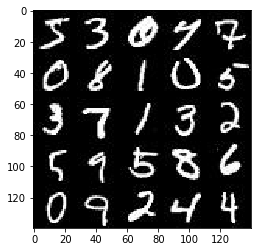

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

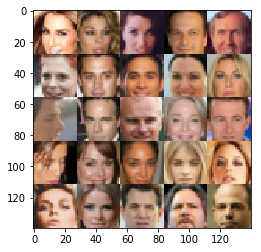

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.4.0
Default GPU Device: /device:GPU:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, shape=(None, image_width, image_height, image_channels), name = 'input_real')
    inputs_z = tf.placeholder(tf.float32, shape=(None, z_dim), name = 'input_z')
    learning_rate = tf.placeholder(tf.float32, shape=())
    

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


In [6]:
tf.reset_default_graph()

### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def leaky_ReLU(x,alpha):
    output = tf.maximum(alpha*x, x)
    return output

In [33]:
def discriminator(images, reuse=False, alpha=0.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    keep_prob = 0.8
    
    with tf.variable_scope('discriminator', reuse=reuse):
        #28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = leaky_ReLU(x1,alpha)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        batch_norm2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = leaky_ReLU(batch_norm2,alpha)
        relu2 = tf.nn.dropout(relu2,keep_prob=keep_prob)
        #7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        batch_norm3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = leaky_ReLU(batch_norm3,alpha)
        relu3 = tf.nn.dropout(relu3,keep_prob=keep_prob)
        #4x4x256
        
        
        flat = tf.reshape(relu3, (-1,4*4*256))
        logits = tf.layers.dense(flat,1)
        output = tf.sigmoid(logits)
        
        
    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [34]:
def generator(z, out_channel_dim, is_train=True, alpha=0.1):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    keep_prob = 0.8
    
    with tf.variable_scope('generator', reuse=(not is_train)):
        x1 = tf.layers.dense(z, 7*7*256)
        x1 = tf.reshape(x1, (-1,7,7,256))
        x1 = tf.layers.batch_normalization(x1,training=is_train)
        x1 = leaky_ReLU(x1,alpha)
        #7x7x256
        
        x2 = tf.layers.conv2d_transpose(x1, 128,5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2,training=is_train)
        x2 = leaky_ReLU(x2,alpha)
        x2 = tf.nn.dropout(x2,keep_prob=keep_prob)
        #14x14x128
        
        x3 = tf.layers.conv2d_transpose(x2, 64,5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3,training=is_train)
        x3 = leaky_ReLU(x3,alpha)
        x3 = tf.nn.dropout(x3,keep_prob=keep_prob)
        #28x28x64
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim,5, strides=1, padding='same')
        
        output = tf.tanh(logits)
    
    
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [10]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    #Generating images
    gen_model = generator(input_z, out_channel_dim)    
    #Classification of real and fake data 
    dis_real_data_output, dis_real_data_logits = discriminator(input_real)
    dis_fake_data_output, dis_fake_data_logits = discriminator(gen_model, reuse=True)
    
    #Labels
    smooth = 0.1
    real_labels = tf.ones_like(dis_real_data_output)*(1 - smooth)
    fake_labels = tf.zeros_like(dis_fake_data_output)
    gen_labels = tf.ones_like(dis_fake_data_output)
    
    
    #Discriminator loss    
    dis_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_real_data_logits, labels=real_labels))
    dis_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_fake_data_logits, labels=fake_labels))
    dis_loss = dis_real_loss + dis_fake_loss
    #Generator loss
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_fake_data_logits, labels=gen_labels))
    
    
    return dis_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [27]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    train_vars = tf.trainable_variables()
    gen_vars = [var for var in train_vars if var.name.startswith('generator')]
    dis_vars = [var for var in train_vars if var.name.startswith('discriminator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        dis_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(d_loss, var_list=dis_vars)
        gen_train_opt = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=gen_vars)

    return dis_train_opt, gen_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [23]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [31]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode,
          print_values_freq=10,print_images_freq=100):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    inputs_real, inputs_z, lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    
    dis_loss, gen_loss = model_loss(inputs_real, inputs_z, data_shape[3])
    
    dis_train_opt, gen_train_opt = model_opt(dis_loss, gen_loss, learning_rate, beta1)
    
    
    losses = []
    count = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                count += 1
                batch_images = batch_images*2
                
                #Sample random noise
                batch_z = np.random.uniform(-1,1, size=(batch_size,z_dim))
                
                #Run optimizers
                _ = sess.run(dis_train_opt, feed_dict={inputs_real:batch_images, inputs_z:batch_z, lr:learning_rate})
                _ = sess.run(gen_train_opt, feed_dict={inputs_z:batch_z, inputs_real:batch_images})
                
                if count%print_values_freq == 0:
                    train_loss_dis = sess.run(dis_loss, {inputs_z:batch_z, inputs_real:batch_images, lr:learning_rate})
                    train_loss_gen = gen_loss.eval({inputs_z:batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                                  "Discriminator Loss: {:.4f}...".format(train_loss_dis),
                                  "Generator Loss: {:.4f}".format(train_loss_gen))

                    losses.append((train_loss_dis,train_loss_gen))

                if count%print_images_freq == 0:
                    show_generator_output(sess, 16, inputs_z, data_shape[3], data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

In [25]:
#Evaluating the shape
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
mnist_dataset.shape

(60000, 28, 28, 1)

Epoch 1/2... Discriminator Loss: 0.7179... Generator Loss: 2.5430
Epoch 1/2... Discriminator Loss: 2.7232... Generator Loss: 0.4929
Epoch 1/2... Discriminator Loss: 0.9011... Generator Loss: 1.4379
Epoch 1/2... Discriminator Loss: 1.5816... Generator Loss: 0.6654
Epoch 1/2... Discriminator Loss: 1.2953... Generator Loss: 0.7028
Epoch 1/2... Discriminator Loss: 1.1679... Generator Loss: 1.0611
Epoch 1/2... Discriminator Loss: 2.0408... Generator Loss: 0.3388
Epoch 1/2... Discriminator Loss: 1.3460... Generator Loss: 1.7669
Epoch 1/2... Discriminator Loss: 1.1214... Generator Loss: 1.6741
Epoch 1/2... Discriminator Loss: 1.1769... Generator Loss: 0.8271


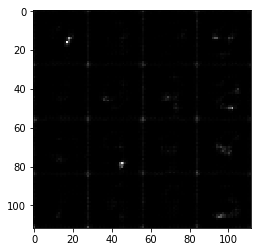

Epoch 1/2... Discriminator Loss: 1.0217... Generator Loss: 1.1961
Epoch 1/2... Discriminator Loss: 1.0345... Generator Loss: 1.1793
Epoch 1/2... Discriminator Loss: 1.0095... Generator Loss: 1.5301
Epoch 1/2... Discriminator Loss: 1.1056... Generator Loss: 1.0064
Epoch 1/2... Discriminator Loss: 1.0821... Generator Loss: 0.9117
Epoch 1/2... Discriminator Loss: 1.7989... Generator Loss: 0.4322
Epoch 1/2... Discriminator Loss: 1.3712... Generator Loss: 0.6701
Epoch 1/2... Discriminator Loss: 1.3047... Generator Loss: 0.7400
Epoch 1/2... Discriminator Loss: 1.1917... Generator Loss: 1.7481
Epoch 1/2... Discriminator Loss: 1.3287... Generator Loss: 1.5264


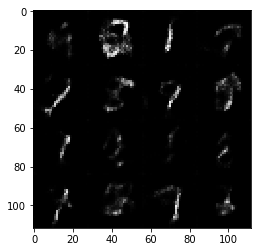

Epoch 1/2... Discriminator Loss: 1.2347... Generator Loss: 0.9351
Epoch 1/2... Discriminator Loss: 1.1457... Generator Loss: 1.0467
Epoch 1/2... Discriminator Loss: 1.2334... Generator Loss: 0.8597
Epoch 1/2... Discriminator Loss: 1.0605... Generator Loss: 1.0391
Epoch 1/2... Discriminator Loss: 1.3644... Generator Loss: 0.6153
Epoch 1/2... Discriminator Loss: 1.2007... Generator Loss: 0.8381
Epoch 1/2... Discriminator Loss: 1.0374... Generator Loss: 1.4145
Epoch 1/2... Discriminator Loss: 1.1970... Generator Loss: 0.7956
Epoch 1/2... Discriminator Loss: 1.0911... Generator Loss: 1.1238
Epoch 1/2... Discriminator Loss: 1.2720... Generator Loss: 0.7174


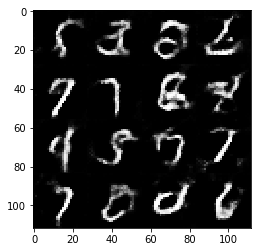

Epoch 1/2... Discriminator Loss: 1.2186... Generator Loss: 0.6804
Epoch 1/2... Discriminator Loss: 1.0605... Generator Loss: 1.3656
Epoch 1/2... Discriminator Loss: 1.2550... Generator Loss: 0.7342
Epoch 1/2... Discriminator Loss: 1.2802... Generator Loss: 0.8292
Epoch 1/2... Discriminator Loss: 1.5086... Generator Loss: 2.1325
Epoch 1/2... Discriminator Loss: 1.0819... Generator Loss: 1.0369
Epoch 1/2... Discriminator Loss: 1.1013... Generator Loss: 1.2692
Epoch 1/2... Discriminator Loss: 1.2360... Generator Loss: 1.8236
Epoch 1/2... Discriminator Loss: 1.2409... Generator Loss: 0.7960
Epoch 1/2... Discriminator Loss: 1.3570... Generator Loss: 2.1470


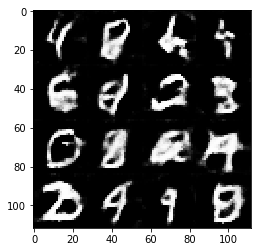

Epoch 1/2... Discriminator Loss: 1.1414... Generator Loss: 1.8250
Epoch 1/2... Discriminator Loss: 1.0642... Generator Loss: 0.9304
Epoch 1/2... Discriminator Loss: 1.1513... Generator Loss: 1.1064
Epoch 1/2... Discriminator Loss: 1.1165... Generator Loss: 1.0835
Epoch 1/2... Discriminator Loss: 1.2310... Generator Loss: 0.7974
Epoch 1/2... Discriminator Loss: 1.0941... Generator Loss: 1.1391
Epoch 2/2... Discriminator Loss: 1.1756... Generator Loss: 0.7797
Epoch 2/2... Discriminator Loss: 1.0559... Generator Loss: 1.0175
Epoch 2/2... Discriminator Loss: 1.1107... Generator Loss: 0.9410
Epoch 2/2... Discriminator Loss: 1.1902... Generator Loss: 0.7803


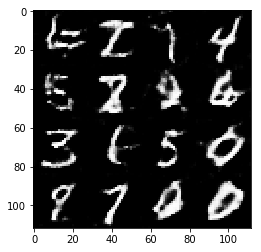

Epoch 2/2... Discriminator Loss: 1.0316... Generator Loss: 1.2518
Epoch 2/2... Discriminator Loss: 1.3027... Generator Loss: 0.6798
Epoch 2/2... Discriminator Loss: 1.5201... Generator Loss: 0.4980
Epoch 2/2... Discriminator Loss: 1.1316... Generator Loss: 0.8960
Epoch 2/2... Discriminator Loss: 1.2222... Generator Loss: 2.0770
Epoch 2/2... Discriminator Loss: 1.0751... Generator Loss: 1.8813
Epoch 2/2... Discriminator Loss: 1.0212... Generator Loss: 1.3005
Epoch 2/2... Discriminator Loss: 1.1379... Generator Loss: 1.2455
Epoch 2/2... Discriminator Loss: 1.1357... Generator Loss: 1.4293
Epoch 2/2... Discriminator Loss: 1.2133... Generator Loss: 0.7666


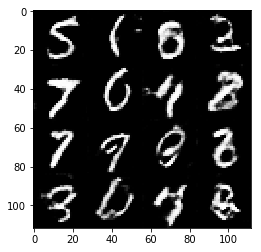

Epoch 2/2... Discriminator Loss: 0.9889... Generator Loss: 1.2304
Epoch 2/2... Discriminator Loss: 1.1086... Generator Loss: 1.1153
Epoch 2/2... Discriminator Loss: 1.0622... Generator Loss: 1.3453
Epoch 2/2... Discriminator Loss: 1.1192... Generator Loss: 0.8934
Epoch 2/2... Discriminator Loss: 1.1160... Generator Loss: 0.8267
Epoch 2/2... Discriminator Loss: 1.2693... Generator Loss: 1.8000
Epoch 2/2... Discriminator Loss: 1.2407... Generator Loss: 2.1129
Epoch 2/2... Discriminator Loss: 1.1256... Generator Loss: 0.8488
Epoch 2/2... Discriminator Loss: 1.0047... Generator Loss: 2.0410
Epoch 2/2... Discriminator Loss: 1.3635... Generator Loss: 0.6545


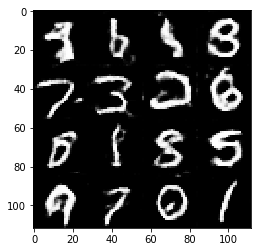

Epoch 2/2... Discriminator Loss: 1.3812... Generator Loss: 0.5540
Epoch 2/2... Discriminator Loss: 1.0883... Generator Loss: 1.6591
Epoch 2/2... Discriminator Loss: 1.2056... Generator Loss: 1.7794
Epoch 2/2... Discriminator Loss: 1.6987... Generator Loss: 2.4146
Epoch 2/2... Discriminator Loss: 1.1208... Generator Loss: 1.0998
Epoch 2/2... Discriminator Loss: 1.0546... Generator Loss: 1.2167
Epoch 2/2... Discriminator Loss: 1.1365... Generator Loss: 1.5772
Epoch 2/2... Discriminator Loss: 1.2137... Generator Loss: 1.5035
Epoch 2/2... Discriminator Loss: 0.9567... Generator Loss: 1.4074
Epoch 2/2... Discriminator Loss: 1.0688... Generator Loss: 1.2685


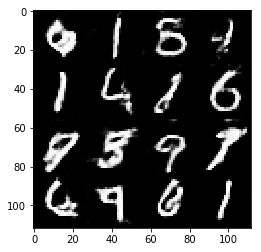

Epoch 2/2... Discriminator Loss: 1.0364... Generator Loss: 1.3691
Epoch 2/2... Discriminator Loss: 1.1851... Generator Loss: 0.8511
Epoch 2/2... Discriminator Loss: 0.9778... Generator Loss: 1.2520
Epoch 2/2... Discriminator Loss: 2.5537... Generator Loss: 4.0135
Epoch 2/2... Discriminator Loss: 1.1720... Generator Loss: 0.9564
Epoch 2/2... Discriminator Loss: 1.1414... Generator Loss: 1.2165
Epoch 2/2... Discriminator Loss: 1.0872... Generator Loss: 1.5835
Epoch 2/2... Discriminator Loss: 1.1188... Generator Loss: 0.8856
Epoch 2/2... Discriminator Loss: 1.1445... Generator Loss: 1.0793
Epoch 2/2... Discriminator Loss: 1.2022... Generator Loss: 0.8171


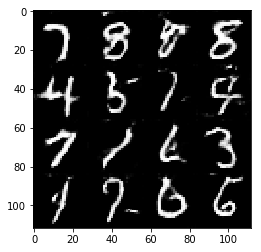

Epoch 2/2... Discriminator Loss: 1.0838... Generator Loss: 1.2392
Epoch 2/2... Discriminator Loss: 1.0235... Generator Loss: 1.4007
Epoch 2/2... Discriminator Loss: 0.9413... Generator Loss: 1.2497


In [36]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.2843... Generator Loss: 0.9058
Epoch 1/1... Discriminator Loss: 1.2820... Generator Loss: 8.8440
Epoch 1/1... Discriminator Loss: 0.7483... Generator Loss: 1.9076
Epoch 1/1... Discriminator Loss: 0.7137... Generator Loss: 3.2252
Epoch 1/1... Discriminator Loss: 0.5007... Generator Loss: 2.8368
Epoch 1/1... Discriminator Loss: 0.4201... Generator Loss: 3.7477
Epoch 1/1... Discriminator Loss: 0.4529... Generator Loss: 3.4665
Epoch 1/1... Discriminator Loss: 0.7004... Generator Loss: 1.8356
Epoch 1/1... Discriminator Loss: 1.0723... Generator Loss: 6.2770
Epoch 1/1... Discriminator Loss: 0.6679... Generator Loss: 1.6322


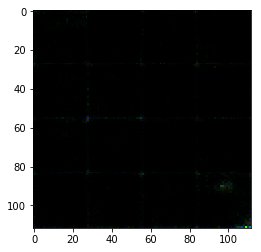

Epoch 1/1... Discriminator Loss: 0.8203... Generator Loss: 1.5247
Epoch 1/1... Discriminator Loss: 2.3356... Generator Loss: 0.3100
Epoch 1/1... Discriminator Loss: 0.7027... Generator Loss: 1.6541
Epoch 1/1... Discriminator Loss: 0.6468... Generator Loss: 2.2477
Epoch 1/1... Discriminator Loss: 0.8513... Generator Loss: 1.8511
Epoch 1/1... Discriminator Loss: 0.7135... Generator Loss: 1.7314
Epoch 1/1... Discriminator Loss: 0.7254... Generator Loss: 2.0348
Epoch 1/1... Discriminator Loss: 0.8997... Generator Loss: 1.0842
Epoch 1/1... Discriminator Loss: 1.4468... Generator Loss: 0.5825
Epoch 1/1... Discriminator Loss: 0.6533... Generator Loss: 2.0782


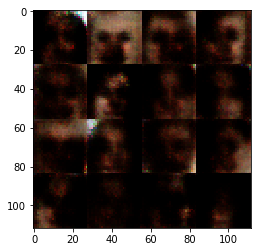

Epoch 1/1... Discriminator Loss: 0.8190... Generator Loss: 1.7883
Epoch 1/1... Discriminator Loss: 0.7883... Generator Loss: 1.4002
Epoch 1/1... Discriminator Loss: 1.0048... Generator Loss: 1.5248
Epoch 1/1... Discriminator Loss: 0.7238... Generator Loss: 1.9575
Epoch 1/1... Discriminator Loss: 0.8735... Generator Loss: 1.4539
Epoch 1/1... Discriminator Loss: 0.9158... Generator Loss: 1.3341
Epoch 1/1... Discriminator Loss: 1.0837... Generator Loss: 2.3679
Epoch 1/1... Discriminator Loss: 0.9728... Generator Loss: 1.1349
Epoch 1/1... Discriminator Loss: 2.5554... Generator Loss: 4.1415
Epoch 1/1... Discriminator Loss: 0.9997... Generator Loss: 1.1447


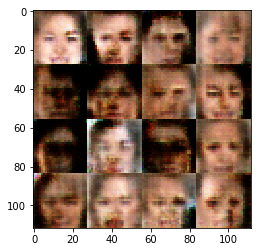

Epoch 1/1... Discriminator Loss: 1.0413... Generator Loss: 0.8369
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 2.0247
Epoch 1/1... Discriminator Loss: 2.5338... Generator Loss: 4.5700
Epoch 1/1... Discriminator Loss: 1.1137... Generator Loss: 0.8806
Epoch 1/1... Discriminator Loss: 0.9931... Generator Loss: 1.3059
Epoch 1/1... Discriminator Loss: 0.9653... Generator Loss: 1.4303
Epoch 1/1... Discriminator Loss: 1.7793... Generator Loss: 3.1892
Epoch 1/1... Discriminator Loss: 0.8940... Generator Loss: 1.2894
Epoch 1/1... Discriminator Loss: 1.0370... Generator Loss: 1.7334
Epoch 1/1... Discriminator Loss: 1.0872... Generator Loss: 1.4339


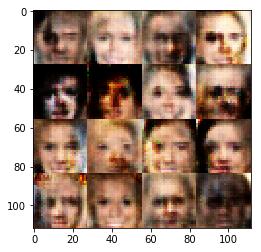

Epoch 1/1... Discriminator Loss: 0.9350... Generator Loss: 1.4016
Epoch 1/1... Discriminator Loss: 1.0711... Generator Loss: 0.8641
Epoch 1/1... Discriminator Loss: 0.9474... Generator Loss: 1.4806
Epoch 1/1... Discriminator Loss: 1.1104... Generator Loss: 1.4480
Epoch 1/1... Discriminator Loss: 1.0657... Generator Loss: 1.7284
Epoch 1/1... Discriminator Loss: 1.3001... Generator Loss: 0.6396
Epoch 1/1... Discriminator Loss: 1.1549... Generator Loss: 0.9093
Epoch 1/1... Discriminator Loss: 1.1536... Generator Loss: 0.9381
Epoch 1/1... Discriminator Loss: 0.9974... Generator Loss: 1.3634
Epoch 1/1... Discriminator Loss: 1.1486... Generator Loss: 1.1950


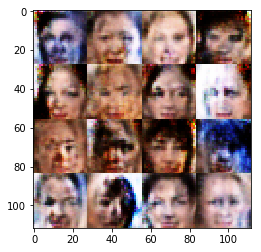

Epoch 1/1... Discriminator Loss: 1.0612... Generator Loss: 1.5245
Epoch 1/1... Discriminator Loss: 1.4656... Generator Loss: 1.9313
Epoch 1/1... Discriminator Loss: 1.0738... Generator Loss: 1.1382
Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 0.6956
Epoch 1/1... Discriminator Loss: 1.1613... Generator Loss: 1.0601
Epoch 1/1... Discriminator Loss: 0.9381... Generator Loss: 1.2180
Epoch 1/1... Discriminator Loss: 0.9957... Generator Loss: 1.4574
Epoch 1/1... Discriminator Loss: 0.9712... Generator Loss: 1.1461
Epoch 1/1... Discriminator Loss: 1.1927... Generator Loss: 1.6778
Epoch 1/1... Discriminator Loss: 1.7776... Generator Loss: 0.3908


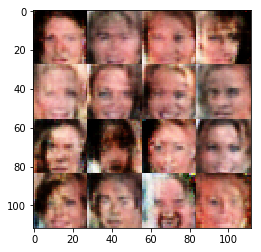

Epoch 1/1... Discriminator Loss: 1.0931... Generator Loss: 1.5794
Epoch 1/1... Discriminator Loss: 1.3444... Generator Loss: 0.5885
Epoch 1/1... Discriminator Loss: 1.1970... Generator Loss: 1.3203
Epoch 1/1... Discriminator Loss: 1.0459... Generator Loss: 1.0220
Epoch 1/1... Discriminator Loss: 1.0900... Generator Loss: 0.9894
Epoch 1/1... Discriminator Loss: 1.1792... Generator Loss: 1.0656
Epoch 1/1... Discriminator Loss: 1.0777... Generator Loss: 1.1475
Epoch 1/1... Discriminator Loss: 1.2115... Generator Loss: 1.4485
Epoch 1/1... Discriminator Loss: 1.2005... Generator Loss: 1.0006
Epoch 1/1... Discriminator Loss: 1.2618... Generator Loss: 1.4837


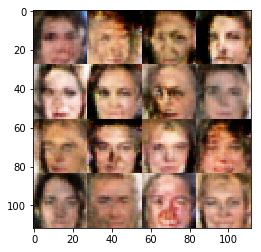

Epoch 1/1... Discriminator Loss: 1.1713... Generator Loss: 1.1663
Epoch 1/1... Discriminator Loss: 1.7097... Generator Loss: 0.4577
Epoch 1/1... Discriminator Loss: 1.1658... Generator Loss: 0.7587
Epoch 1/1... Discriminator Loss: 1.2057... Generator Loss: 1.5047
Epoch 1/1... Discriminator Loss: 1.3501... Generator Loss: 0.9770
Epoch 1/1... Discriminator Loss: 1.4187... Generator Loss: 0.6146
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 0.5807
Epoch 1/1... Discriminator Loss: 1.1819... Generator Loss: 1.3452
Epoch 1/1... Discriminator Loss: 1.1103... Generator Loss: 1.2153
Epoch 1/1... Discriminator Loss: 1.2631... Generator Loss: 0.9319


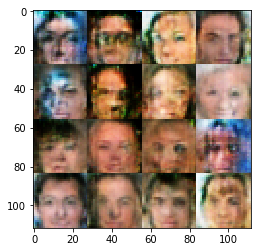

Epoch 1/1... Discriminator Loss: 1.2436... Generator Loss: 0.7486
Epoch 1/1... Discriminator Loss: 1.1299... Generator Loss: 1.2948
Epoch 1/1... Discriminator Loss: 1.2118... Generator Loss: 1.0756
Epoch 1/1... Discriminator Loss: 1.2717... Generator Loss: 0.7133
Epoch 1/1... Discriminator Loss: 1.1886... Generator Loss: 0.9057
Epoch 1/1... Discriminator Loss: 1.2327... Generator Loss: 1.2688
Epoch 1/1... Discriminator Loss: 1.1912... Generator Loss: 1.2895
Epoch 1/1... Discriminator Loss: 1.3117... Generator Loss: 0.9853
Epoch 1/1... Discriminator Loss: 1.2950... Generator Loss: 0.7824
Epoch 1/1... Discriminator Loss: 1.2935... Generator Loss: 0.6794


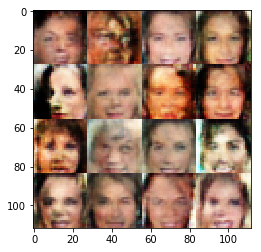

Epoch 1/1... Discriminator Loss: 1.3276... Generator Loss: 0.5819
Epoch 1/1... Discriminator Loss: 1.3134... Generator Loss: 1.4381
Epoch 1/1... Discriminator Loss: 1.2360... Generator Loss: 0.8988
Epoch 1/1... Discriminator Loss: 1.5593... Generator Loss: 0.4923
Epoch 1/1... Discriminator Loss: 1.2241... Generator Loss: 0.9232
Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.7367
Epoch 1/1... Discriminator Loss: 1.1700... Generator Loss: 1.2354
Epoch 1/1... Discriminator Loss: 1.2561... Generator Loss: 0.8823
Epoch 1/1... Discriminator Loss: 1.2981... Generator Loss: 0.9297
Epoch 1/1... Discriminator Loss: 1.2967... Generator Loss: 1.3427


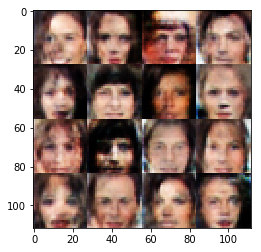

Epoch 1/1... Discriminator Loss: 1.1322... Generator Loss: 0.9810
Epoch 1/1... Discriminator Loss: 1.1783... Generator Loss: 0.8046
Epoch 1/1... Discriminator Loss: 1.2172... Generator Loss: 0.8428
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.5945
Epoch 1/1... Discriminator Loss: 1.3025... Generator Loss: 0.6221
Epoch 1/1... Discriminator Loss: 1.2400... Generator Loss: 1.2228
Epoch 1/1... Discriminator Loss: 1.1536... Generator Loss: 1.0470
Epoch 1/1... Discriminator Loss: 1.0899... Generator Loss: 1.1708
Epoch 1/1... Discriminator Loss: 1.1153... Generator Loss: 1.1964
Epoch 1/1... Discriminator Loss: 1.3582... Generator Loss: 0.6974


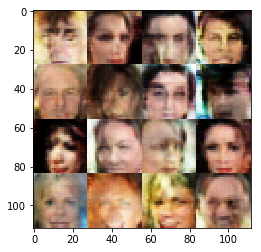

Epoch 1/1... Discriminator Loss: 1.2311... Generator Loss: 1.6090
Epoch 1/1... Discriminator Loss: 1.3122... Generator Loss: 0.9290
Epoch 1/1... Discriminator Loss: 1.1662... Generator Loss: 0.9883
Epoch 1/1... Discriminator Loss: 1.2815... Generator Loss: 0.8107
Epoch 1/1... Discriminator Loss: 1.0893... Generator Loss: 1.0730
Epoch 1/1... Discriminator Loss: 1.1797... Generator Loss: 0.9899
Epoch 1/1... Discriminator Loss: 1.1697... Generator Loss: 1.0029
Epoch 1/1... Discriminator Loss: 1.2609... Generator Loss: 1.2470
Epoch 1/1... Discriminator Loss: 1.3476... Generator Loss: 1.1267
Epoch 1/1... Discriminator Loss: 1.2545... Generator Loss: 1.0565


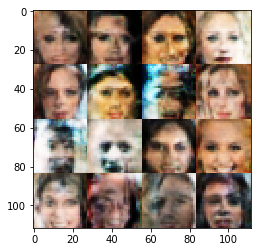

Epoch 1/1... Discriminator Loss: 1.2250... Generator Loss: 0.9861
Epoch 1/1... Discriminator Loss: 1.2601... Generator Loss: 1.3188
Epoch 1/1... Discriminator Loss: 1.1490... Generator Loss: 1.3877
Epoch 1/1... Discriminator Loss: 1.1849... Generator Loss: 1.0655
Epoch 1/1... Discriminator Loss: 1.2387... Generator Loss: 1.0225
Epoch 1/1... Discriminator Loss: 1.1764... Generator Loss: 1.0059
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.6745
Epoch 1/1... Discriminator Loss: 1.3405... Generator Loss: 0.7048
Epoch 1/1... Discriminator Loss: 1.1639... Generator Loss: 1.1272
Epoch 1/1... Discriminator Loss: 1.1681... Generator Loss: 0.9843


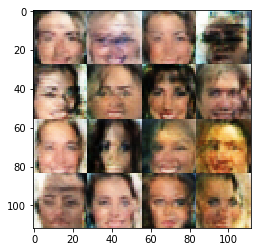

Epoch 1/1... Discriminator Loss: 1.2331... Generator Loss: 0.7265
Epoch 1/1... Discriminator Loss: 1.3128... Generator Loss: 0.9494
Epoch 1/1... Discriminator Loss: 1.2720... Generator Loss: 0.7870
Epoch 1/1... Discriminator Loss: 1.2628... Generator Loss: 0.7173
Epoch 1/1... Discriminator Loss: 1.1675... Generator Loss: 1.0854
Epoch 1/1... Discriminator Loss: 1.2305... Generator Loss: 0.8156
Epoch 1/1... Discriminator Loss: 1.1113... Generator Loss: 0.9410
Epoch 1/1... Discriminator Loss: 1.2904... Generator Loss: 0.8029
Epoch 1/1... Discriminator Loss: 1.1051... Generator Loss: 1.1285
Epoch 1/1... Discriminator Loss: 1.2629... Generator Loss: 1.1242


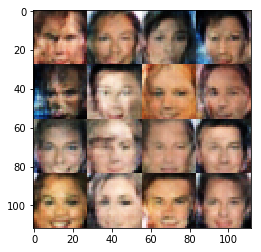

Epoch 1/1... Discriminator Loss: 1.2106... Generator Loss: 0.8470
Epoch 1/1... Discriminator Loss: 1.1418... Generator Loss: 1.1991
Epoch 1/1... Discriminator Loss: 1.2493... Generator Loss: 1.5075
Epoch 1/1... Discriminator Loss: 1.1627... Generator Loss: 1.1272
Epoch 1/1... Discriminator Loss: 1.2930... Generator Loss: 0.8620
Epoch 1/1... Discriminator Loss: 1.4883... Generator Loss: 0.5692
Epoch 1/1... Discriminator Loss: 1.2679... Generator Loss: 0.8673
Epoch 1/1... Discriminator Loss: 1.0936... Generator Loss: 1.1851
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 0.8639
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 0.7344


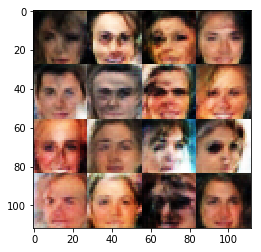

Epoch 1/1... Discriminator Loss: 1.2600... Generator Loss: 0.8307
Epoch 1/1... Discriminator Loss: 1.3242... Generator Loss: 0.7606
Epoch 1/1... Discriminator Loss: 1.2039... Generator Loss: 1.0812
Epoch 1/1... Discriminator Loss: 1.1751... Generator Loss: 1.2756
Epoch 1/1... Discriminator Loss: 1.2547... Generator Loss: 0.9555
Epoch 1/1... Discriminator Loss: 1.1342... Generator Loss: 1.2223
Epoch 1/1... Discriminator Loss: 1.2342... Generator Loss: 0.8686
Epoch 1/1... Discriminator Loss: 1.1364... Generator Loss: 1.3013


In [37]:
batch_size = 128
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.